# 분석으로 갈꺼면 굉장히 중요한 내용이다!

# ***** 중요 *****
# 확률적 경사 하강법(SGD: Stochastic Gradient Descent)
    # Random! 편미분(기울기)가 0인 값을 찾는 과정
- 머신러닝에도 많이 사용하지만 실질적으로는 딥러닝에서 많이 사용한다.  
- 데이터가 추가 되었을 경우 머신러닝 처리 방법  

1. 새로운 데이터로 모델을 추가하여 새롭게 학습하여 처리한다.
2. 추가된 갯수만큼 기존의 데이터를 버리고 사용한다.
3. 기존 모델을 수정하면서 사용한다 (점진적 학습방법)

- 데이터가 추가하였을 경우에도 새로운 모델을 만들지 않고 기존의 모델을 수정하면서 사용할 수 있는 방법
- 머신러닝 및 딥러닝 알고리즘을 훈련하는 방법 또는 최적화 하는 방법이지 머신러닝이나 딥러닝의 모델이 되진 않는다.
- 확률적 -> 랜덤, 경사 -> 기울기를 의미
- 곡선의 최적점을 찾기 위해 기울기를 기준으로 조금씩 이동하면서 최적점을 찾는 방법

<img src='../Data/하강법설명.png' width= 600, height = 250>

> 모집단에서 한개만 => 확률적 경사하강법(Stochastic Gradient Descent: SGD)  

> 모집단에서 몇개만 => 미니 배치 경사하강법(Mini-Batch Stochastic Gradient Descent: MSGD)  
: 미니배치의 갯수 : Hyper Parameter, 보통은 2의 배수

> 모집단에서 한번에 다 => 배치 경사하강법(Batch Gradient Descent: BGD)  
: 샘플을 한번에 몽땅 꺼내면 컴퓨터 메모리나 CPU에 영향을 줄 수 있어서 거의 사용이 안되고 주로 확률적,미니배치를 사용

> Epoch(이파크) : 훈련세트를 다 사용하였을 경우의 단계

> 최적값(0을 향해)을 찾기위해서 조금씩 경사를 이동시키는 방법이다.

### 손실함수(비용함수)
- 머신러닝 알고리즘이 에러율을 측정하는 함수
- 손실함수 값이 적은것이 정확도가 높은 것이다.
- 확률적 경사함수를 통해서 손실함수가 낮은 값을 찾는 것이다.
- 분류함수인 경우에는 정확도를 사용하는데 이 정확도의 값은 미분할 수 없어서(연속성이 없어) 손실함수로 사용할 수 없다.
- 분류함수인 경우에는 로지스틱 손실함수, 이진크로스엔트로피 손실함수를 사용한다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

fish= pd.read_csv('../Data/fishes.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# Feature
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [4]:
# Target
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [5]:
# Train과 Test의 분리

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [13]:
# 표준화 시키기
# : 경사 하강법을 사용하는 경우에는 샘픙릐 크기때문에 경사의 각도가 바뀔수 있으므로 각 Feature의 Scale을 표준점수로 변경하여야 한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.fit_transform(test_input)

---
### 확률적 경사하강법의 분류 알고리즘 적용

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
sc = SGDClassifier(
    # 손실함수는 뭘 쓸거니? -> 로지스틱 손실함수
    loss='log',
    # 몇번 돌릴꺼니? -> 10번 Epoch
    max_iter=10,
    random_state=42
)

In [16]:
sc.fit(train_scaled, train_target)
print("train score :", sc.score(train_scaled, train_target))
print("test score :", sc.score(test_scaled, test_target))

train score : 0.773109243697479
test score : 0.725


> score가 별로 좋지않고 과소적합 되어서  
> partial_fit을 사용한다. 기존 w와 b의 계수값을 유지한채 Update하는 방법  
> 만약에 다시 fit을 사용하면 기존에 학습했던 내용을 모두 버린다.  


In [45]:
# partial_fit이 기존에 공부했던걸 기억하고 있어서 W,B를 수정하면서 학습한다.
sc.partial_fit(train_scaled, train_target)
print("train score :", sc.score(train_scaled, train_target))
print("test score :", sc.score(test_scaled, test_target))

train score : 0.9411764705882353
test score : 0.9


> 처음의 점수보다 기존에 학습했던 내용에 새로운 학습내용을 수정해서 사용하면 점수가 증가했다.  
> 이와 같이 점직적으로 정확도를 높이는 방법이 확률적 경사 하강법이다.  
> 처음보다는 점수가 증가했지만 아직 과소적합이다. 약간의 차이가 나는 과대적합이 제일 좋은 방법이다.  

---
### Epoch의 과대/과소적합
- 규제값이 작아지면 과대적합이 된다.
- 조기종료(Early Stopping) : 적합한 Epoch의 위치를 찾으면 종료한다.

<img src='../Data/Epoch.png' width=300 height=220> 

In [46]:
import numpy as np
sc = SGDClassifier(
    loss='log',
    random_state=42
)
train_score = []
test_score = []
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [47]:
# i 대신 _(언더바)를 쓰면 횟수를 쓴다는 뜻(for 문 안에 i값을 쓰지 않을 경우)
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    # partial_fit을 하기전에 fit을 사용하지 않았으면, 
    # classes를 정의해 주어야 부분 수정이 아니라 전체 classes에 대해 수정작업이 일어난다.
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

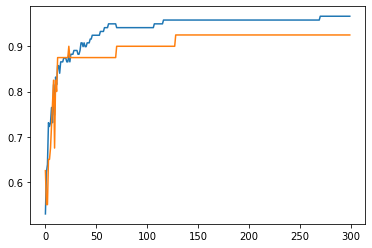

In [48]:
# 그래프 그려보기
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)

plt.show()

> 100정도의 Epoch가 좋은 것 같다.

In [49]:
# 새롭게 시작
sc = SGDClassifier(
        loss="log",
        max_iter=100,
        # tol : 조기 종료 시점이나 현재는 정지기준이 없고 반복기간 동안의 최적의 손실값보다 큰 경우 조기종료된다.
        tol=None,
        random_state=42
    )
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.9


In [51]:
# 조기종료 시점 적용

sc = SGDClassifier(
        loss="log",
        max_iter=100,
        tol=1.0e-3,
        random_state=42
    )
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.75


---
### SVM을 이용한 확률적 경사 하강법

In [54]:
sc = SGDClassifier(
    loss='hinge', # hinge = SVM
    max_iter=100,
        tol=None,
        random_state=42
    )
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.9
